<a href="https://colab.research.google.com/github/chopley/data_science_interviews/blob/main/Example_data_science_interview_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Can you generate and plot two normal distributions (N=100) with 
1. a(μ=1,σ=0.5) and 
2. b(μ=2, σ=0.2) 
on the same axis.


In [37]:
import pandas as pd
import numpy as np

In [38]:
a = np.random.normal(loc=1,scale=0.5, size = 100)
b = np.random.normal(loc=2,scale=0.2, size = 100)

In [39]:
a_df = pd.DataFrame(a)
b_df = pd.DataFrame(b)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f66dded92d0>]],
      dtype=object)

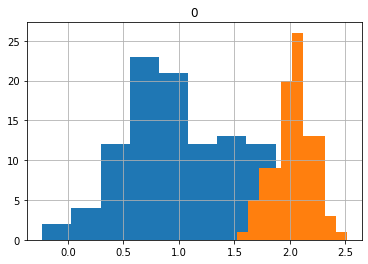

In [40]:
ax = a_df.hist()
b_df.hist(ax=ax)

In [41]:
from scipy.stats import ks_2samp
from scipy.stats import ttest_ind

Can you demonstrate that the two distributions have different means using the two methods above? 

In [42]:
ks_test = ks_2samp(a_df.iloc[:, 0].values, b_df.iloc[:, 0].values)
t_test = ttest_ind(a_df.iloc[:, 0].values, b_df.iloc[:, 0].values)

In [43]:
ks_test,t_test

(Ks_2sampResult(statistic=0.9, pvalue=4.958889584060123e-43),
 Ttest_indResult(statistic=-20.38360398804563, pvalue=1.6348359325230332e-50))

There is a git repo on https://github.com/chopley/data_science_interviews.git- 

There is a sample data set in the repo under data_sets called ```pennies_sample.csv```

Can you clone it here locally and read in the data?

In [112]:
! git clone https://github.com/chopley/data_science_interviews.git

Cloning into 'data_science_interviews'...
remote: Enumerating objects: 11, done.
remote: Counting objects: 100% (11/11), done.
remote: Compressing objects: 100% (8/8), done.
remote: Total 11 (delta 0), reused 8 (delta 0), pack-reused 0
Unpacking objects: 100% (11/11), done.


In [111]:
! rm -rf data_science_interviews

In [113]:
! ls data_science_interviews/data_sets

chick_weight.csv  pennies_sample.csv


In [65]:
pennies = pd.read_csv("data_science_interviews/data_sets/pennies_sample.csv")


This sample data set has the ages of 50 coins that are representative of US pennies. 

What kind of distribution do you think the ages of these coins do you think they would follow?

Can you now plot it?


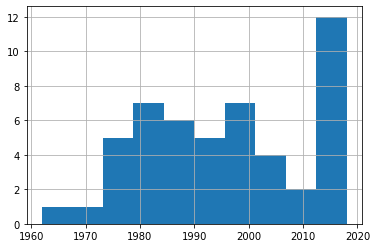

In [67]:
pennies.year.hist()

Assuming the year follows a normal distribution, can you now calculate the mean and standard error of the mean?

In [110]:
n_samples = len(pennies.year)
pennies.year.mean(), pennies.year.std()/np.sqrt(n_samples )

(1995.44, 2.146123225250401)

Can you use a bootstrap resampling to get to the same value as above?

In [107]:
penny_years = []
n_bootstraps = 1000
for penny_year_estimate in range(0,n_bootstraps):
  resample = pennies.sample(frac=1,replace=True)
  penny_years.append(resample.year.mean())



array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f66dd357b50>]],
      dtype=object)

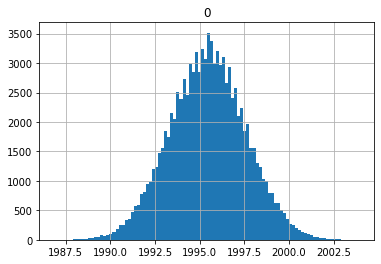

In [108]:
pd.DataFrame(penny_years).hist(bins=100)

In [109]:
pd.DataFrame(penny_years).mean().values[0], pd.DataFrame(penny_years).std().values[0]

(1995.4447379999915, 2.1220422045724736)

In [114]:
chick_weight = pd.read_csv("data_science_interviews/data_sets/chick_weight.csv")

In [115]:
chick_weight

,Unnamed: 0,weight,Time,Chick,Diet
0,1,42,0,1,1
1,2,51,2,1,1
2,3,59,4,1,1
3,4,64,6,1,1
4,5,76,8,1,1
...,...,...,...,...,...
573,574,175,14,50,4
574,575,205,16,50,4
575,576,234,18,50,4
576,577,264,20,50,4


In [ ]:
def bootstrap_mean(data, n_bootstraps = 100):
  estimates = []
  for estimate in range(0,n_bootstraps):
    resample = data.sample(frac=1,replace=True)
    estimates.append(resample.mean())
  return(estimates)

Can you extract the final weight of birds for each diet?

In [121]:
chick_weight[chick_weight["Time"]==chick_weight["Time"].max()]

,Unnamed: 0,weight,Time,Chick,Diet
11,12,205,21,1,1
23,24,215,21,2,1
35,36,202,21,3,1
47,48,157,21,4,1
59,60,223,21,5,1
71,72,157,21,6,1
83,84,305,21,7,1
106,107,98,21,9,1
118,119,124,21,10,1
130,131,175,21,11,1


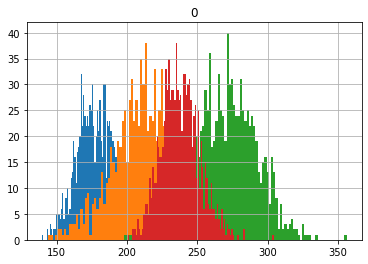

In [147]:
diet_list = []
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 1)
for diet in [1,2,3,4]:
  data= chick_weight[(chick_weight["Time"]==chick_weight["Time"].max()) & (chick_weight["Diet"] == diet)]
  mu = bootstrap_mean(data.weight,n_bootstraps=1000)
  pd.DataFrame(mu).hist(ax=axs,bins=100)
  diet_list.append(data.mean())

                    